In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1Y44Rb3QLkpyhBKEQd9nMiTWs4Vbfkn6_

Downloading...
From: https://drive.google.com/uc?id=1Y44Rb3QLkpyhBKEQd9nMiTWs4Vbfkn6_
To: /content/House_Rent_Dataset.csv
100% 567k/567k [00:00<00:00, 75.4MB/s]


In [3]:
data= pd.read_csv("House_Rent_Dataset.csv")

In [4]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
# Create two new Features from the 'Floor' Feature
floor_split = data['Floor'].str.split('out of',expand=True)

#cleanning white space
data['Current Floor'] = floor_split[0].str.strip()
data['Total Building Floors'] = floor_split[1].str.strip()

In [6]:
# Replace 'Ground' with 0, 'Upper Basement' with -1 and 'lower Basement' with -2
data['Current Floor'] = data['Current Floor'].replace({'Ground':0,'Upper Basement':-1,'Lower Basement': -2,'Nan':0})

In [7]:
#Drop the feature 'Floor'
data.drop('Floor',axis=1,inplace=True)

In [8]:
data.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current Floor,Total Building Floors
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [9]:
data['Current Floor'].unique()

array([0, '1', '2', '4', '3', '5', '7', '8', -1, '11', -2, '6', '14',
       '43', '13', '18', '17', '9', '19', '60', '34', '12', '26', '25',
       '53', '16', '10', '39', '32', '47', '28', '20', '15', '65', '40',
       '37', '22', '21', '30', '35', '33', '44', '41', '46', '27', '45',
       '48', '50', '24', '23', '29', '49', '36', '76'], dtype=object)

In [10]:
data['Area Type'].value_counts()

,count
Area Type,
Super Area,2446
Carpet Area,2298
Built Area,2


In [11]:
data.shape

(4746, 13)

In [12]:
#convert current floor to dtype int64
data['Current Floor'] = data['Current Floor'].astype('int64')

In [13]:
data.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0
Bathroom,0


In [14]:


data.dtypes

,0
Posted On,object
BHK,int64
Rent,int64
Size,int64
Area Type,object
Area Locality,object
City,object
Furnishing Status,object
Tenant Preferred,object
Bathroom,int64


In [15]:
#Change Posted On dtype to datetime
data['Posted On'] = pd.to_datetime(data['Posted On'])

In [16]:
data.nunique()

,0
Posted On,81
BHK,6
Rent,243
Size,615
Area Type,3
Area Locality,2235
City,6
Furnishing Status,3
Tenant Preferred,3
Bathroom,8


In [17]:
data['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [18]:
data['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [19]:
data['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [20]:
data['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [21]:
data['BHK'].unique()

array([2, 1, 3, 6, 4, 5])

In [22]:
data['Bathroom'].unique()

array([ 2,  1,  3,  5,  4,  6,  7, 10])

In [23]:
# Size and Area Type column needs to be standardized, ie. the value should be converted to built area
# Built Area = Carpet Area * 1.2
# Super Area = Built Area * 1.3

#Changing Carpet Area
data.loc[data['Area Type']=='Carpet Area','Size']=data['Size']*1.2

#Changing Built Area
data.loc[data['Area Type']=='Built Area','Size']=data['Size']*1.3

data['Area Type'] = 'Super Area'
data['Size'] = data['Size'].round(0)

data.head()

/tmp/ipython-input-23-282224795.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1020.  960. 1200. ... 2100. 1800. 1200.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['Area Type']=='Carpet Area','Size']=data['Size']*1.2


,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current Floor,Total Building Floors
0,2022-05-18,2,10000,1100.0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800.0,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000.0,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800.0,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,1020.0,Super Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [24]:
#function to remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [25]:
data_cleaned = remove_outliers_iqr(data, 'Rent')
data_cleaned = remove_outliers_iqr(data_cleaned, 'Size')

# Univariate Analysis
1. Distribution of Rent across all Cities
2. Distribution of Size across all Cities
3. Distribution of Bedroom Counts
4. Distribution of Furnishing Status
5. Distribution of Tenants Preferred

In [26]:
# Initialiazing selected features

data_numcols = ['Rent','Size']

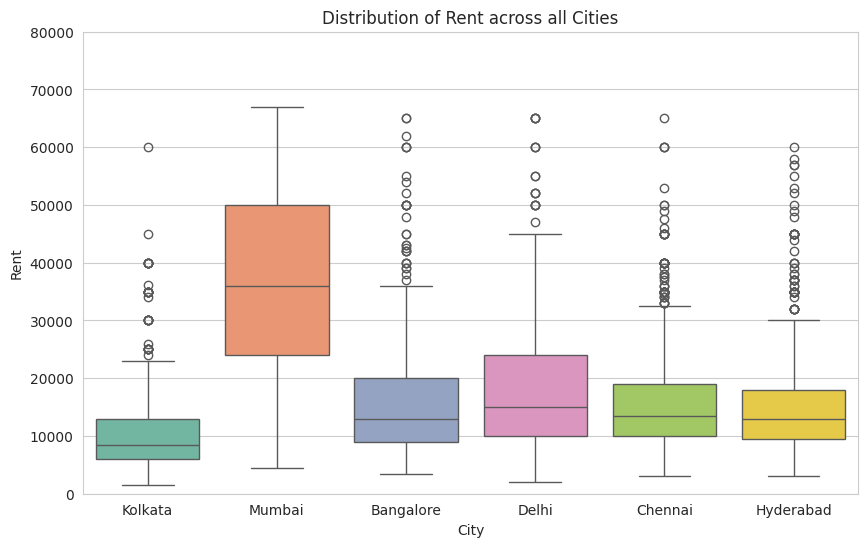

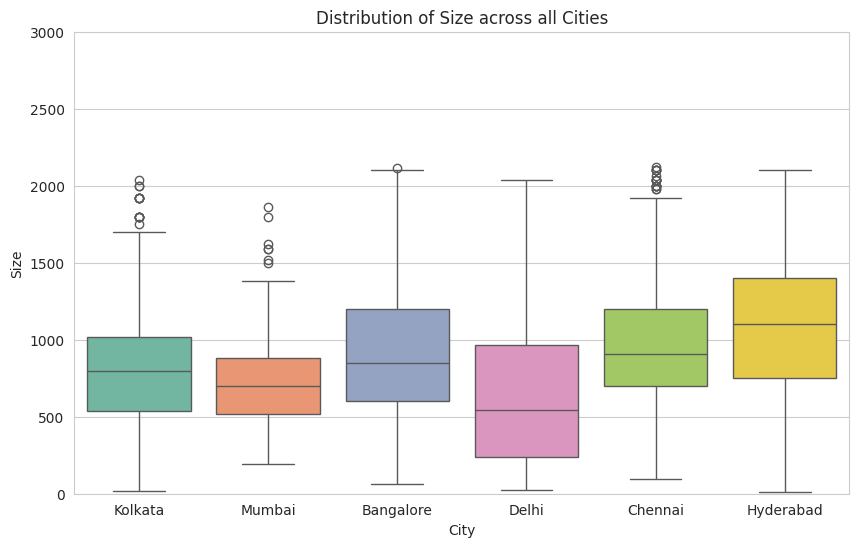

In [27]:
# 1.Distribution of Rent across all Cities
# 2.Distribution of Size across all Cities
for col in data_numcols:
  plt.figure(figsize=(10,6))
  sns.set_style("whitegrid")
  sns.boxplot(data=data_cleaned, y=col, x='City',hue='City',palette="Set2")
  plt.title(f'Distribution of {col} across all Cities')
  if col == 'Rent':
    plt.ylim(0,80000) # Set y-axis limits for Rent
    plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation for the y-axis
  else :
    plt.ylim(0,3000) # Set y-axis limits for Size
  plt.show()

Distribution of Rent across all Cities

This boxplot illustrates the distribution of monthly housing rent across six major Indian cities: Kolkata, Mumbai, Bangalore, Delhi, Chennai, and Hyderabad.
Mumbai stands out with the highest median rent at approximately ₹35,000, along with the widest interquartile range and overall spread. This indicates significant variation in rental prices, likely driven by the city’s high property values and wide socioeconomic diversity.
In contrast, Kolkata has the lowest median rent at around ₹8,000, with a relatively narrow spread, suggesting more uniform and affordable rental options.
Bangalore, Delhi, Chennai, and Hyderabad fall within a similar range, with median rents clustered around ₹15,000. These cities show moderate variability, which may reflect the presence of both mid-range and premium housing developments.
Overall, the chart highlights regional differences in affordability and market diversity, with Mumbai showing the greatest dispersion and Kolkata the most consistency.


Distribution of Size across all Cities

This boxplot displays the distribution of house sizes across major Indian cities.
Delhi has the lowest median size, at approximately 500 sq ft, with an interquartile range starting as low as 250 sq ft, indicating a prevalence of smaller living spaces, possibly due to high population density or compact urban layouts.
Hyderabad shows the highest median size, around 1,150 sq ft, which may reflect the availability of more spacious or luxury housing units.
Chennai, Bangalore, and Kolkata exhibit similar distributions with median sizes around 800 sq ft, while Mumbai has a slightly smaller median of approximately 700 sq ft.
Interestingly, despite Mumbai’s reputation for compact housing, Delhi appears to have even smaller house sizes in this dataset, suggesting higher housing density or a prevalence of micro-apartments in certain localities.


In [28]:
# Initialize categorical columns

data_catcol = ['BHK','Furnishing Status','Tenant Preferred']

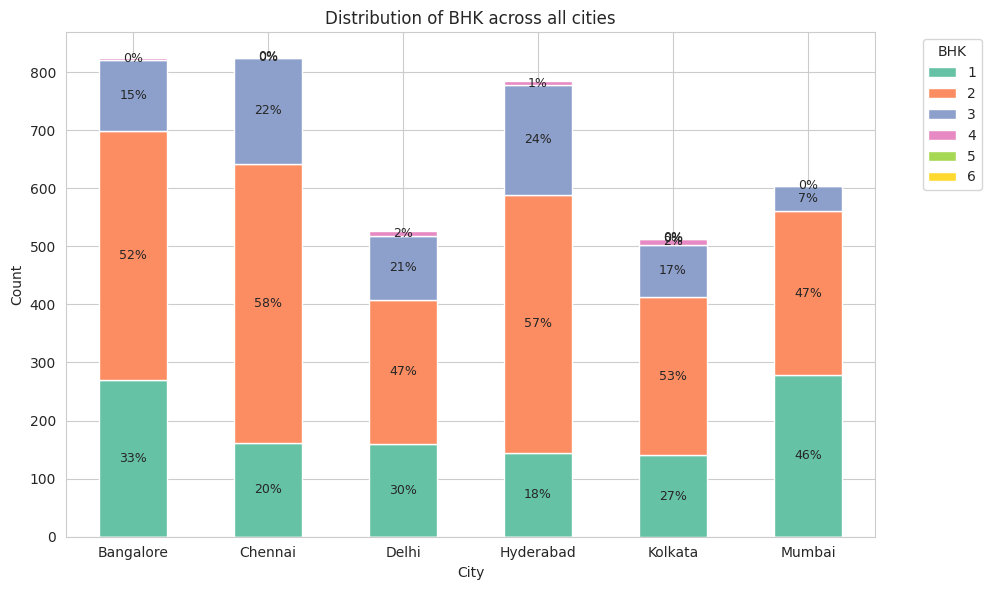

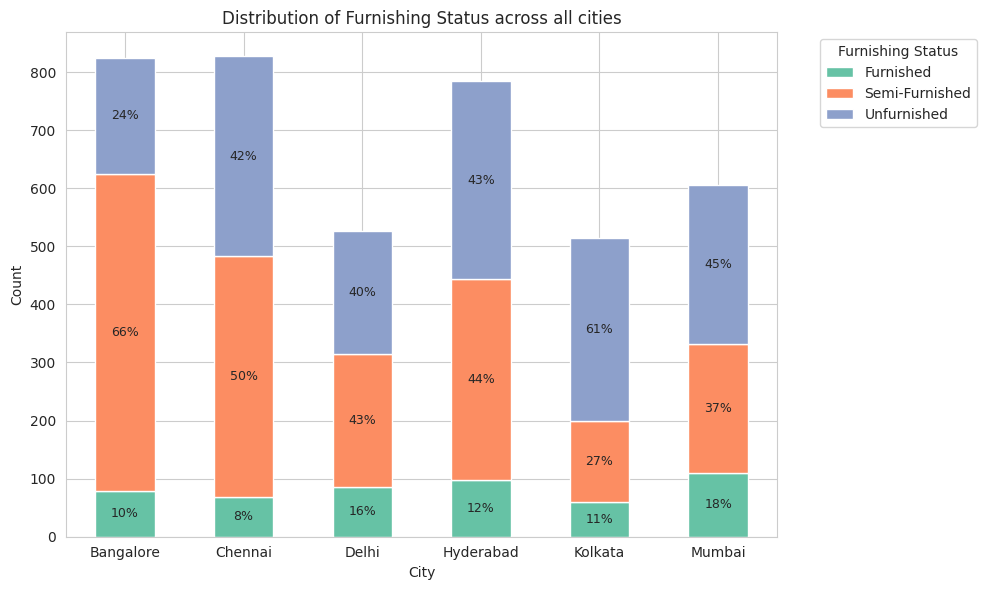

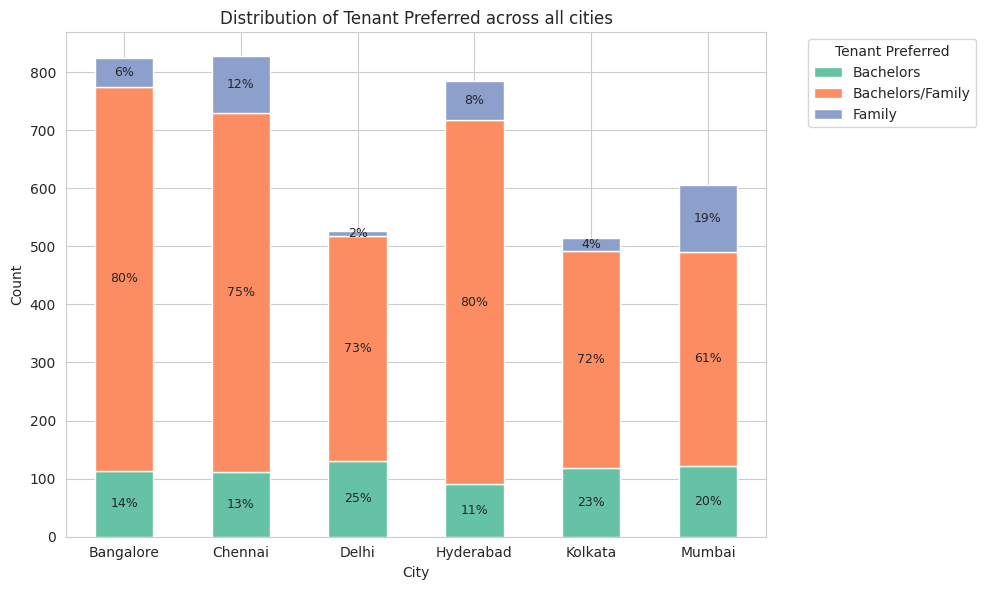

In [29]:
# 3.Distribution of Bedroom Counts
# 4.Distribution of Furnishing Status
# 5.Distribution of Tenants Preferred

for col in data_catcol:
    # Step 1: Crosstab of counts
    crosstab = pd.crosstab(data_cleaned['City'], data_cleaned[col])

    # Step 2: Total per city (row-wise sum) for percentage calc
    row_totals = crosstab.sum(axis=1)

    # Step 3: Plot bar chart with counts
    colors = sns.color_palette("Set2")
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

    # Step 4: Annotate with % values
    for bar_index, city in enumerate(crosstab.index):
        cumulative = 0
        for category_index, category in enumerate(crosstab.columns):
            count = crosstab.loc[city, category]
            percent = count / row_totals[city]

            if count > 0:
                # x = bar index, y = cumulative height + half of current bar
                ax.text(bar_index, cumulative + count / 2,
                        f"{percent:.0%}", ha='center', va='center', fontsize=9)
            cumulative += count

    # Step 5: Customize plot
    plt.title(f'Distribution of {col} across all cities')
    plt.xlabel('City')
    plt.ylabel('Count')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Distribution of BHK across all cities

The distribution of bedroom configurations across Indian cities shows a consistent trend, with 2BHK units comprising 45–55% of the housing stock in most cities.
Mumbai is notably split between 2BHK (47%) and 1BHK (46%) units, with only 7% being 3BHKs — indicating a predominance of smaller homes, possibly due to higher population density and limited space.
In contrast, the other cities have a more balanced mix: 1BHK units account for 20–30%, and 3BHK units range from 15–25%, depending on the city.
Chennai and Hyderabad show a relatively higher proportion of 2BHK and 3BHK homes, suggesting a greater availability of mid- to large-sized units, while Bangalore and Kolkata lean slightly more toward smaller configurations.
Overall, this pattern reflects regional differences in housing development, land availability, and affordability.


Distribution of Furnishing Status across all Cities

The chart illustrates the distribution of housing units by furnishing status across major Indian cities.
Chennai, Hyderabad, Delhi, and Mumbai each have approximately 40–45% of their housing stock in the unfurnished category, while semi-furnished homes constitute 40–50%, and furnished units make up a smaller share of 10–20%.
Kolkata stands out with a higher share of unfurnished homes (61%), followed by semi-furnished (27%) and furnished (11%). This trend aligns with Kolkata's relatively lower rental prices and may reflect lower investment in move-in-ready accommodations.
In contrast, Bangalore shows a strong preference for semi-furnished homes (66%), with fewer unfurnished (24%) and furnished (10%) units. This could be indicative of higher demand from working professionals, students, and young families who prefer homes with basic fittings but not necessarily full furnishings.
Overall, furnishing preferences appear to reflect a mix of affordability, mobility, and lifestyle needs across cities.


Distribution of Tenants Preferred across all Cities

This chart illustrates the distribution of housing supply based on tenant preferences across major Indian cities.
In most cities, the majority of listings (70–80%) are open to both bachelors and families, indicating a flexible rental market. Mumbai, however, shows a relatively lower share in this category at 61%, and stands out with a more balanced distribution among the other two categories: 19% of listings are for bachelors only, and 20% for families only.
The other cities display a smaller proportion of listings that restrict tenants to just one group. For instance, listings exclusively for bachelors range from 11% to 25%, while family-only preferences range from 5% to 12%, except in Delhi, which shows a notably low 2% preference for families.
Mumbai’s distribution suggests a more deliberate segmentation of rental offerings, potentially reflecting the city's diverse housing demand and landlord strategies to target specific tenant groups.


# Bivariate Analysis

1. Relationship Between Rent and Property Size
2. Rent Distribution by Furnishing Status
3. Rent Distribution by Tenant Preferred
4. Size Distribution by Furnishing Status
5. Size Distribution by Tenant Preferred
6. Rent Distribution by No of Bedrooms


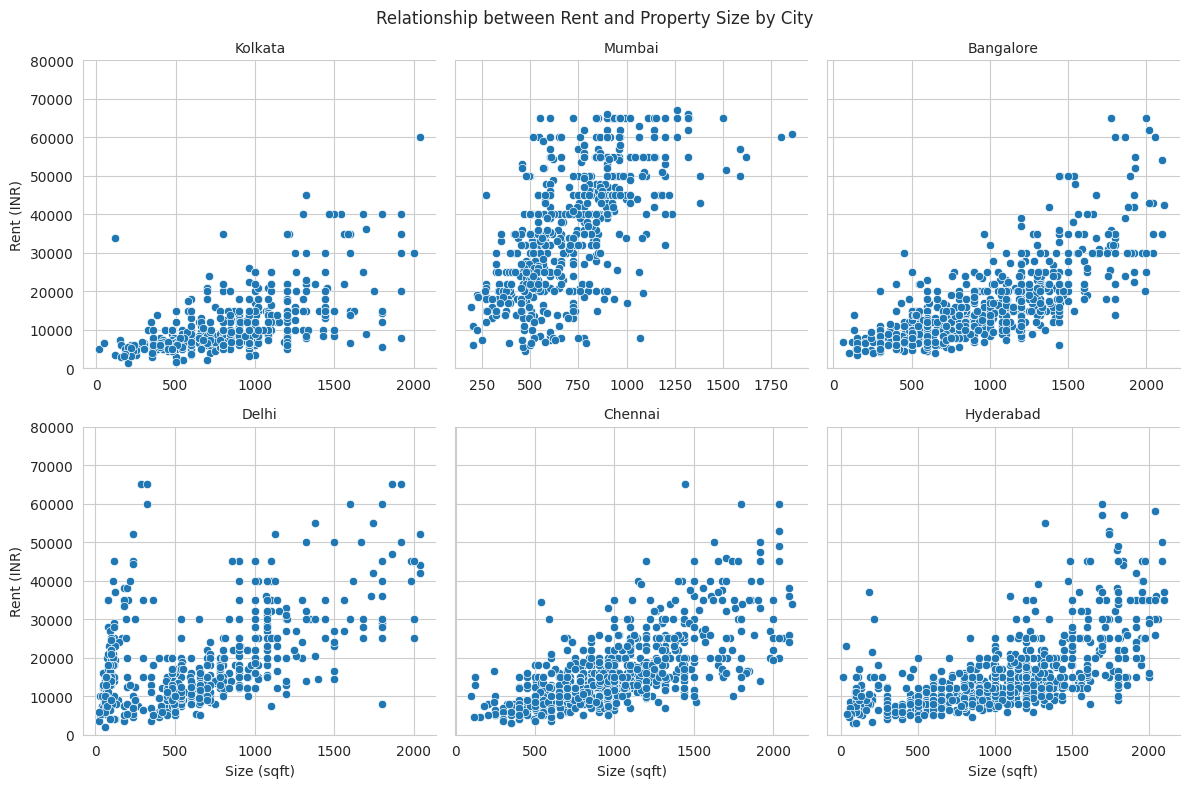

In [30]:

#1.Relationship Between Rent and Property Size


# Create a FacetGrid: one plot per City
g = sns.FacetGrid(data_cleaned, col='City', col_wrap=3, height=4, sharex=False, sharey=True)

# Map the scatter plot to each subplot
g.map_dataframe(sns.scatterplot, x='Size', y='Rent')

# Add a main title and adjust axis formatting
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Size (sqft)", "Rent (INR)")
for ax in g.axes.flat:
    ax.set_ylim(0, 80000)  # Set y-axis limit
    ax.ticklabel_format(style='plain', axis='y')  # Disable scientific notation

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Relationship between Rent and Property Size by City")
plt.tight_layout()
plt.show()


Relationship between Rent and Property Size by City

This set of scatter plots illustrates the relationship between monthly rent and property size across major Indian cities.

In Kolkata, Bangalore, Chennai, and Hyderabad, the trend is relatively consistent — rent tends to increase with property size, with most listings clustered below 1,500 sq ft and corresponding rents typically ranging from ₹5,000 to ₹30,000. Kolkata, in particular, has fewer large-sized properties (above 1,500 sq ft), and its rental values remain lower compared to the other cities.

Delhi displays a more complex pattern with two distinct clusters. One group follows the common upward trend where rent increases with size. However, a second group reveals extremely high rents (up to ₹70,000) for very small units (under 350 sq ft) — possibly reflecting commercial, serviced, or prime-location micro units.

Mumbai shows a steep rise in rent relative to size, with rents ranging from ₹10,000 to ₹70,000 for properties as small as 750 sq ft. This indicates much higher rental costs per square foot, consistent with the city’s premium on limited residential space.

Overall, while most cities show a linear rent-to-size relationship, Delhi and Mumbai stand out with unique market dynamics, highlighting factors like extreme urban density, land scarcity, or specialized housing offerings

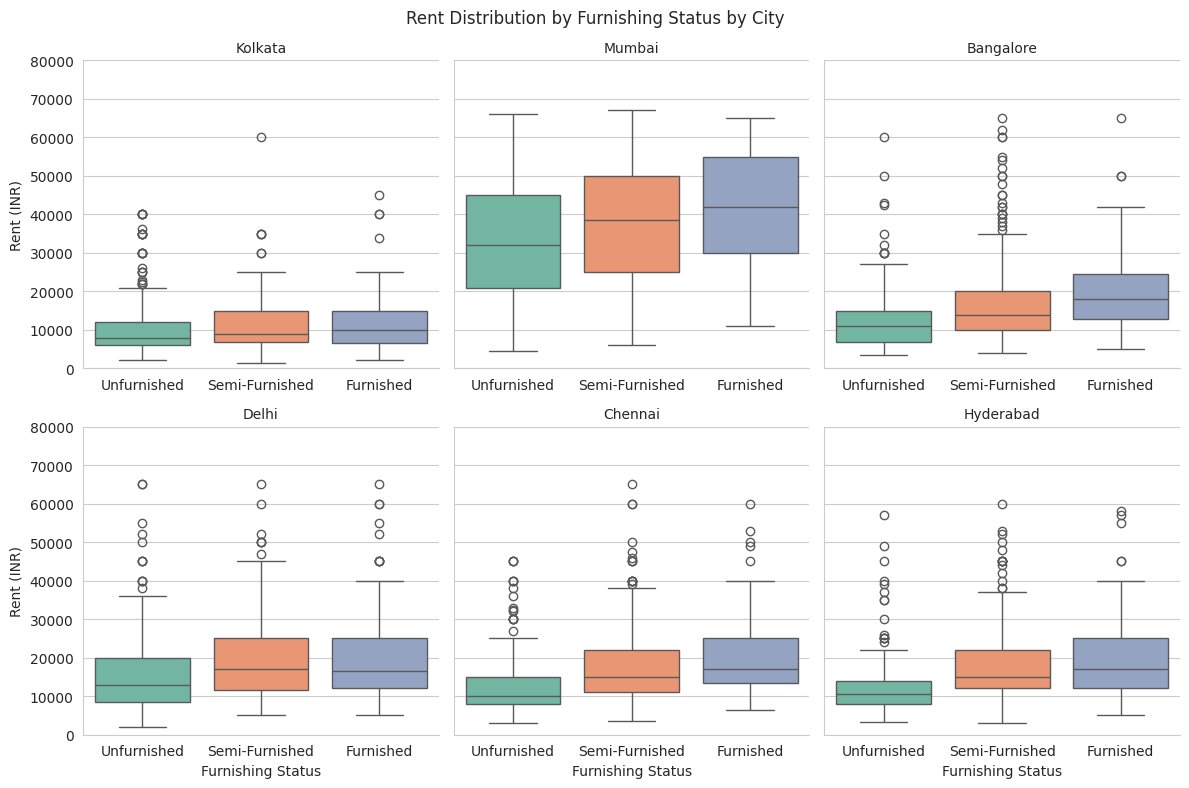

In [31]:
#2.Rent Distribution by Furnishing Status
#3.Rent Distribution by Tenant Preferred

# Create one box plot per city
g_boxplot = sns.FacetGrid(data_cleaned, col='City', col_wrap=3, height=4, sharex=False, sharey=True)

# Map boxplot onto each city-specific subplot
furnishing_order = ['Unfurnished', 'Semi-Furnished', 'Furnished']
set2_colors = sns.color_palette("Set2", n_colors=3)
furnishing_palette = dict(zip(furnishing_order, set2_colors))
g_boxplot.map_dataframe(sns.boxplot, x='Furnishing Status', y='Rent',order=furnishing_order,hue='Furnishing Status',palette=furnishing_palette)

# Customize titles and labels
g_boxplot.set_titles(col_template="{col_name}")
g_boxplot.set_axis_labels("Furnishing Status", "Rent (INR)")

# Format Y axis
for ax in g_boxplot.axes.flat:
    ax.set_ylim(0, 80000)
    ax.ticklabel_format(style='plain', axis='y')

plt.subplots_adjust(top=0.9)
g_boxplot.fig.suptitle("Rent Distribution by Furnishing Status by City")
plt.tight_layout()
plt.show()


Rent Distribution by Furnishing Status by City

These boxplots illustrate the distribution of monthly rent across different furnishing statuses—unfurnished, semi-furnished, and furnished—in major Indian cities.

In Kolkata, the interquartile ranges and medians are nearly identical across all furnishing categories, with a median rent around ₹9,000. This suggests that furnishing has a limited impact on rental pricing in the city, possibly due to an overall emphasis on affordability.

In contrast, Mumbai shows significantly wider IQRs across all furnishing types, with a clear upward trend in medians: from approximately ₹32,000 for unfurnished to ₹42,000 for furnished homes. This reflects a stronger premium placed on additional amenities and readiness to occupy.

The cities of Bangalore, Delhi, Chennai, and Hyderabad also show a progressive increase in median rent and interquartile range from unfurnished to furnished properties, though within a more moderate band of ₹10,000 to ₹20,000.

Overall, the data suggests that furnishing status affects rental pricing more significantly in Mumbai and tier-1 cities, whereas in cities like Kolkata, other factors may drive rent levels more strongly than furnishing.

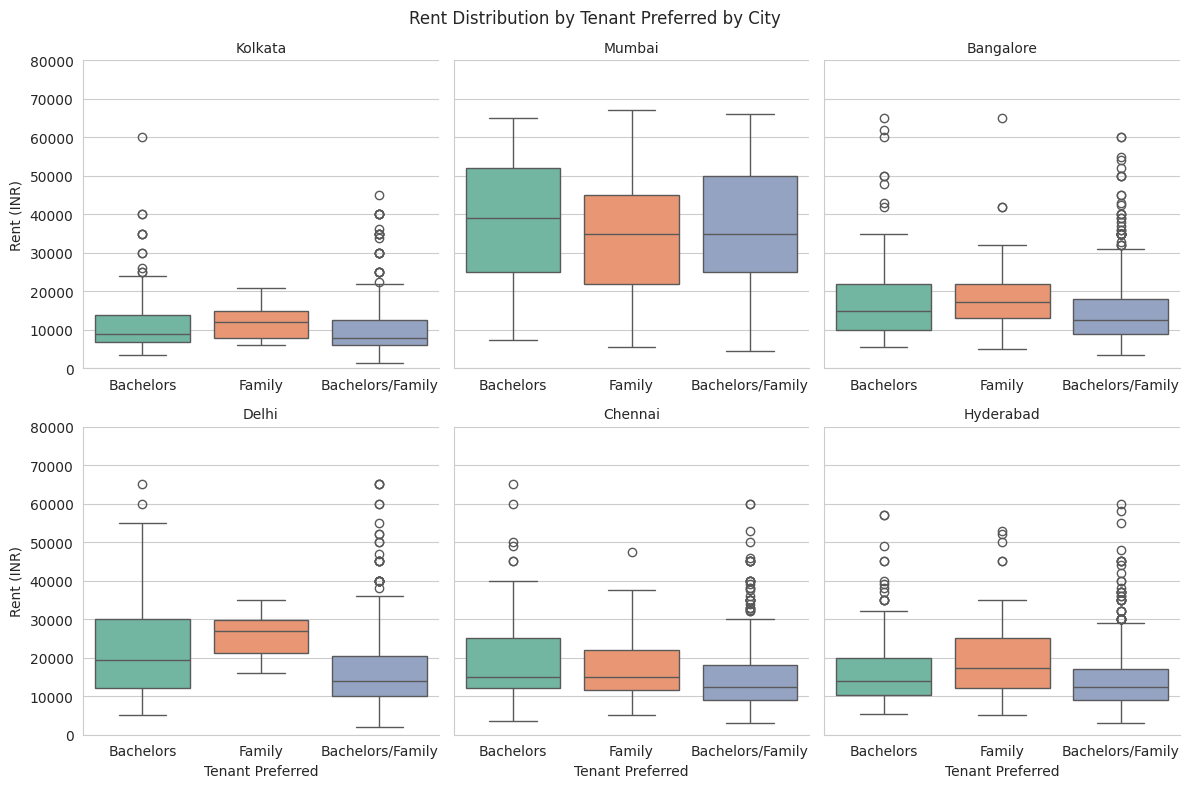

In [32]:
#3.Size Distribution by Furnishing Status
#4.Size Distribution by Tenant Preferred

# Create one box plot per city
g_boxplot_tenant = sns.FacetGrid(data_cleaned, col='City', col_wrap=3, height=4, sharex=False, sharey=True)

# Map boxplot onto each city-specific subplot
tenant_order = ['Bachelors', 'Family', 'Bachelors/Family']
set2_colors = sns.color_palette("Set2", n_colors=3)
tenant_palette = dict(zip(tenant_order, set2_colors))
g_boxplot_tenant.map_dataframe(sns.boxplot, x='Tenant Preferred', y='Rent',order=tenant_order,hue='Tenant Preferred',palette = tenant_palette)

# Customize titles and labels
g_boxplot_tenant.set_titles(col_template="{col_name}")
g_boxplot_tenant.set_axis_labels("Tenant Preferred", "Rent (INR)")

# Format Y axis
for ax in g_boxplot_tenant.axes.flat:
    ax.set_ylim(0, 80000)
    ax.ticklabel_format(style='plain', axis='y')

plt.subplots_adjust(top=0.9)
g_boxplot_tenant.fig.suptitle("Rent Distribution by Tenant Preferred by City")
plt.tight_layout()
plt.show()

Rent Distribution by Tenant Preferred by City

These boxplots illustrate the distribution of rent across tenant preference categories—Bachelors, Family, and Bachelors/Family—in major Indian cities.
In Mumbai, rents are significantly higher across all tenant types, with median rents ranging from ₹30,000 to ₹40,000, and a wide interquartile range suggesting greater variability.
Delhi also exhibits relatively high rent values, particularly for family-preferred units, which have a median of around ₹30,000. Bachelors-only properties in Delhi show the widest spread, indicating the presence of both low-cost and premium units.
In Kolkata, Bangalore, Chennai, and Hyderabad, rents are lower overall, with median values mostly falling between ₹8,000 and ₹15,000. The distribution across tenant types in these cities is more balanced, although Bachelors/Family listings tend to have slightly lower medians.
Overall, the data suggests that tenant preference influences rent more significantly in Mumbai and Delhi, where segmentation is sharper and pricing varies more by target audience. In contrast, other cities appear to have a more uniform pricing pattern across tenant categories.


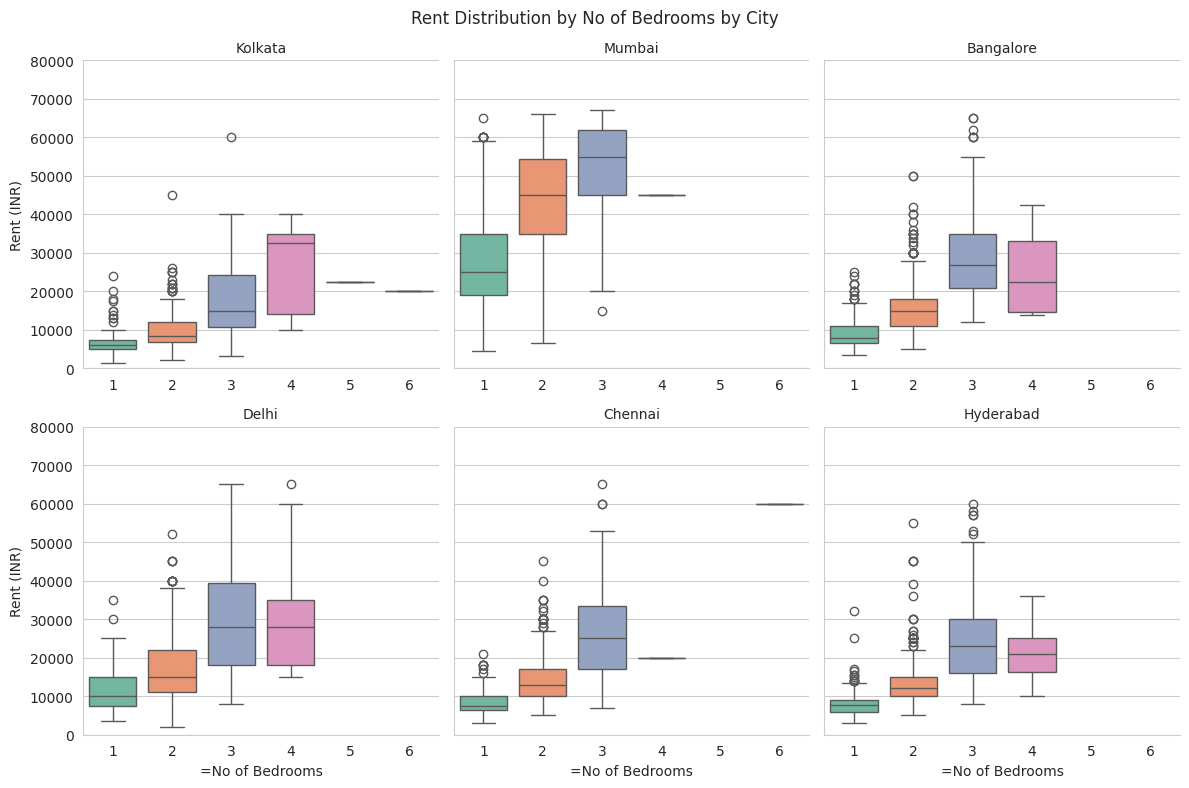

In [33]:
#BHK
# Create one box plot per city
g_boxplot_bhk = sns.FacetGrid(data_cleaned, col='City', col_wrap=3, height=4, sharex=False, sharey=True)

# Map boxplot onto each city-specific subplot
bhk_order = [1,2,3,4,5,6]
set2_colors = sns.color_palette("Set2", n_colors=6)
bhk_palette = dict(zip(bhk_order, set2_colors))
g_boxplot_bhk.map_dataframe(sns.boxplot, x='BHK', y='Rent',order=bhk_order,hue='BHK',palette = bhk_palette)

# Customize titles and labels
g_boxplot_bhk.set_titles(col_template="{col_name}")
g_boxplot_bhk.set_axis_labels("=No of Bedrooms", "Rent (INR)")

# Format Y axis
for ax in g_boxplot_bhk.axes.flat:
    ax.set_ylim(0,80000)
    ax.ticklabel_format(style='plain', axis='y')

plt.subplots_adjust(top=0.9)
g_boxplot_bhk.fig.suptitle("Rent Distribution by No of Bedrooms by City")
plt.tight_layout()
plt.show()

Rent Distribution by Number of Bedrooms by City

These boxplots show the distribution of rent based on the number of bedrooms across major Indian cities.
Mumbai has the highest rents overall, with median values rising steadily from 1BHK to 3BHK units, ranging between ₹25,000 and ₹60,000. The increase in interquartile range (IQR) also indicates higher variability in rents for larger units.
In Kolkata, Bangalore, Delhi, Chennai, and Hyderabad, rents increase progressively with the number of bedrooms, though within a more moderate band. Most cities show 1BHK units renting between ₹5,000 and ₹15,000, while 3BHK and 4BHK units often exceed ₹25,000.
Kolkata and Chennai have a noticeable clustering around lower rent brackets for smaller units, whereas Delhi and Bangalore show wider rent spreads, especially for 3BHK and 4BHK categories.
Overall, rental values scale with the number of bedrooms in all cities, reflecting the expected correlation between unit size and price. Mumbai stands out with significantly higher rents across all categories.


<Axes: xlabel='Current Floor', ylabel='Count'>

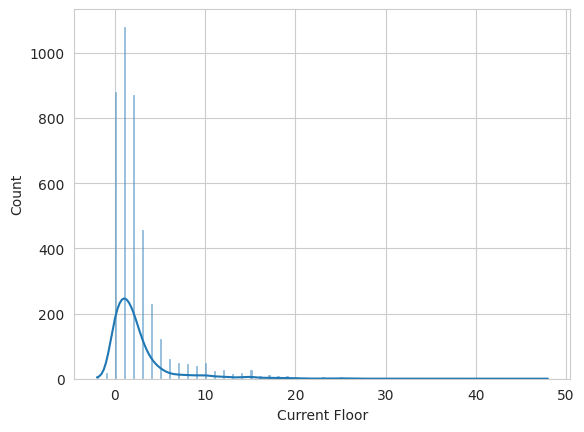

In [34]:
sns.histplot(data=data_cleaned,x='Current Floor',kde=True)

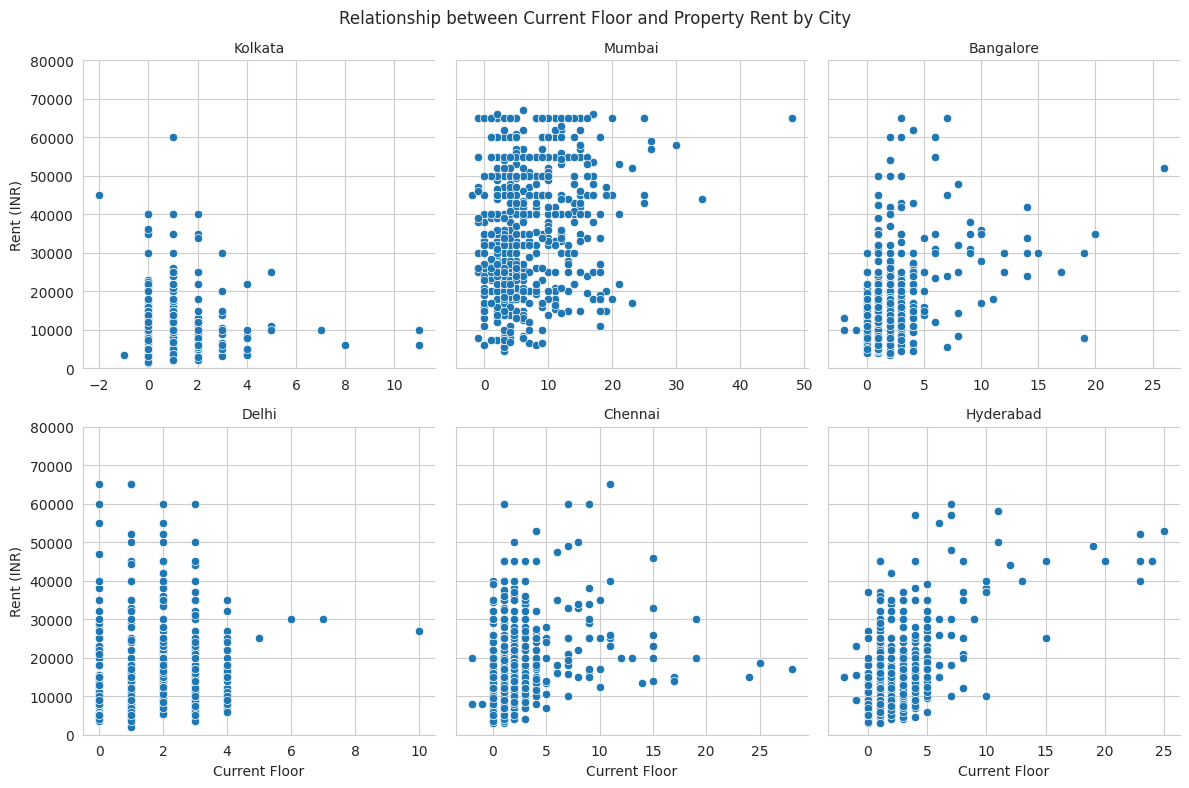

In [35]:
# Create a FacetGrid: one plot per City
g = sns.FacetGrid(data_cleaned, col='City', col_wrap=3, height=4, sharex=False, sharey=True)

# Map the scatter plot to each subplot
g.map_dataframe(sns.scatterplot, x='Current Floor', y='Rent')

# Add a main title and adjust axis formatting
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Current Floor", "Rent (INR)")
for ax in g.axes.flat:
    ax.set_ylim(0, 80000)  # Set y-axis limit
    ax.ticklabel_format(style='plain', axis='y')  # Disable scientific notation

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Relationship between Current Floor and Property Rent by City")
plt.tight_layout()
plt.show()
